# California Housing Prices Dataset

# Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

# Load required Dataset

In [9]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\archive (3)\housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
data.shape

(20640, 10)

In [15]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


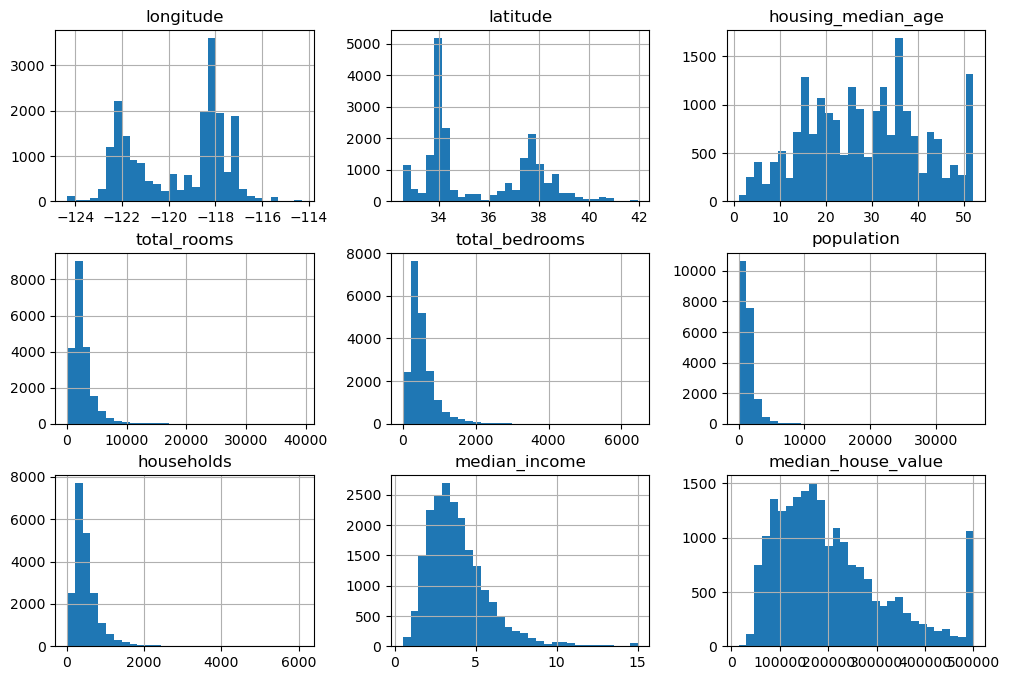

In [19]:
data.hist(bins = 30, figsize = (12,8))
plt.show()

# Identifying Null 

In [21]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [23]:
for column in data.columns:
    if data[column].dtype == object:
        print(column)
        data[column] = data[column].fillna(data[column].mode()[0])
        print('Done')
    else :
        print(column)
        data[column] = data[column].fillna(data[column].mean())
        print('Done')

longitude
Done
latitude
Done
housing_median_age
Done
total_rooms
Done
total_bedrooms
Done
population
Done
households
Done
median_income
Done
median_house_value
Done
ocean_proximity
Done


In [25]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

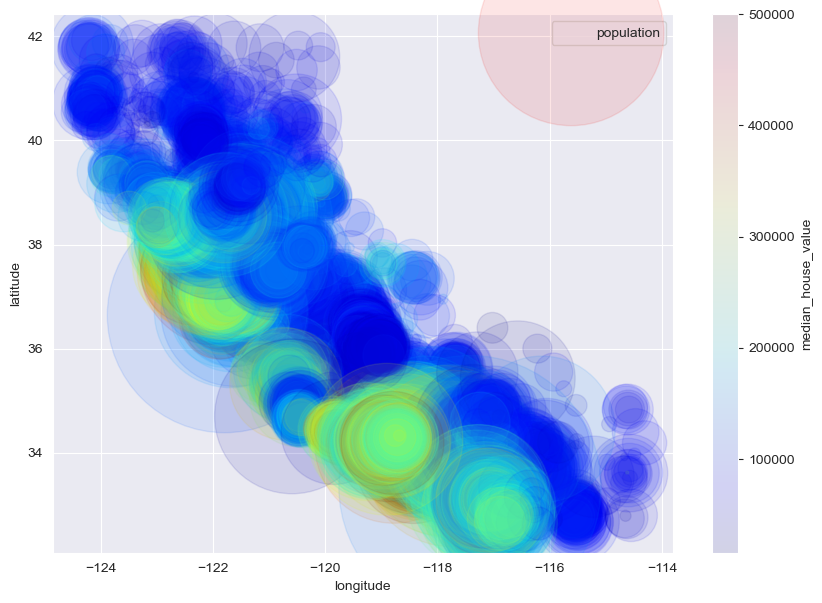

In [145]:
data.plot(kind="scatter", x="longitude",y="latitude", c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=data['population'], label="population", alpha=0.1)
plt.show()

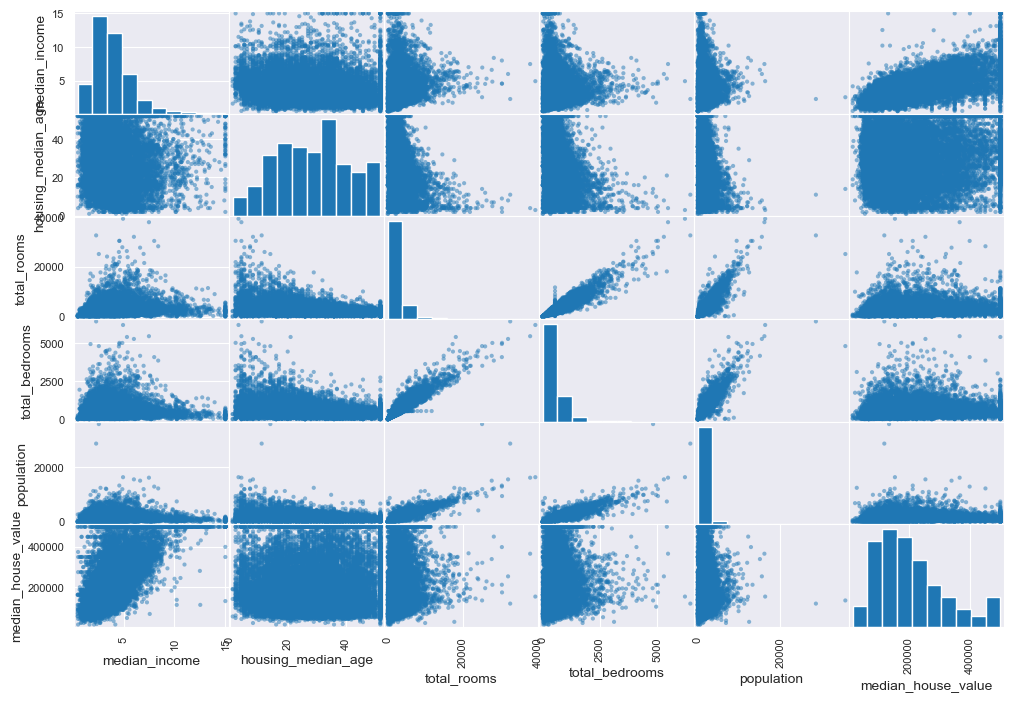

In [147]:
from pandas.plotting import scatter_matrix
attributes = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'ocean_proximity','median_house_value']
scatter_matrix(data[attributes], figsize=(12,8))
plt.show()

In [27]:
def find_correlation(data):
  # computing standard correlation coefficient
  corr_matrix = data.corr()
  # fetch and return attribute correlates 
  # with the median housing value
  return corr_matrix["median_house_value"].sort_values(
    ascending=False)

In [29]:
# drop ocean_proximity column
data_num = data.drop("ocean_proximity", axis=1)
# find correlation coefficient
cor_coef = find_correlation(data_num)
print("Correlation Coefficient::", cor_coef)

Correlation Coefficient:: median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049454
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


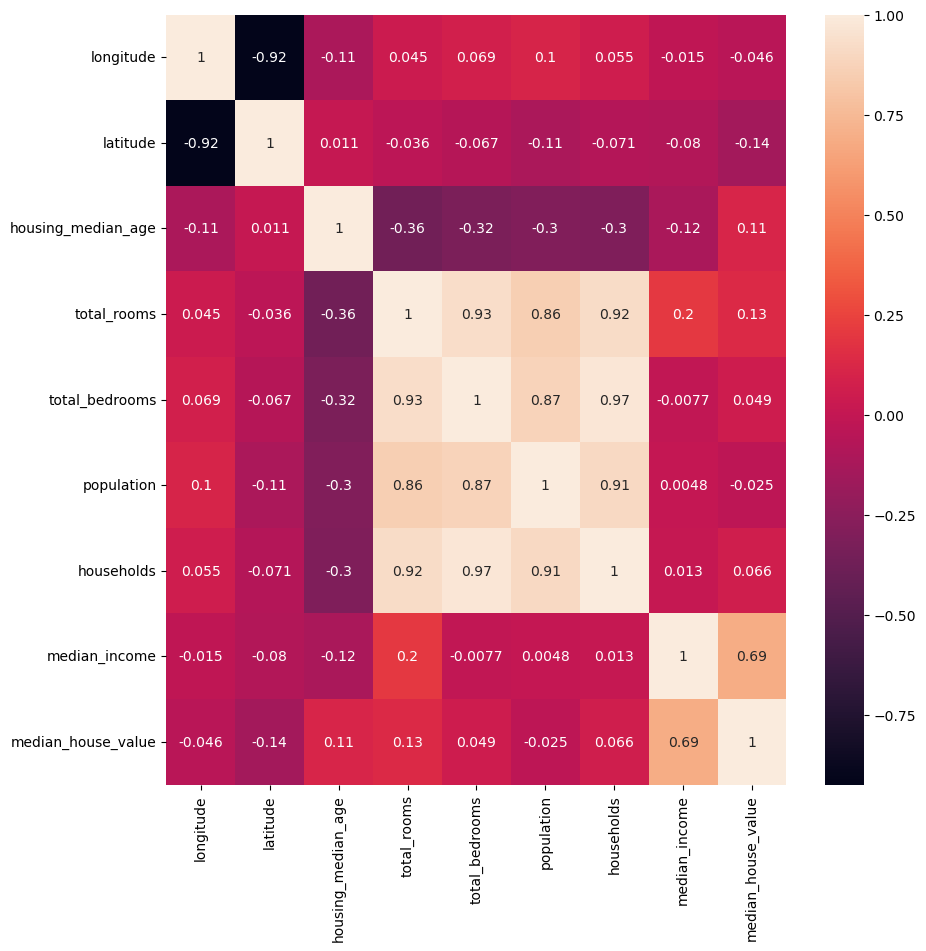

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=True)
plt.show()

In [35]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [37]:
data_na=data.dropna(subset=["total_bedrooms"])
#here I am dropping th eobservations with missing values for total_bedrooms
data_na.shape

(20640, 10)

In [39]:
#here is how to turn category variables into bianary vairiables
dummies=pd.get_dummies(data_na.ocean_proximity)
dummies.head()
data_na_dummies = pd.concat([data_na, dummies], axis='columns')
data_na_dummies.head()
data_clean = data_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


# Train & Test

In [60]:
X=data_clean.drop(['median_house_value'], axis='columns')
X.head()
y=data_clean['median_house_value']

# Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
pd.DataFrame(sc.transform(X))

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,-0.891156,-0.681889,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,-0.891156,-0.681889,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,-0.891156,-0.681889,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,-0.891156,-0.681889,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,-0.891156,-0.681889,2.830742,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-0.891156,1.466514,-0.353264,-0.384466
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-0.891156,1.466514,-0.353264,-0.384466
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.891156,1.466514,-0.353264,-0.384466
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-0.891156,1.466514,-0.353264,-0.384466


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.2, 
                                                    random_state=1984)

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression 
OLS = LinearRegression()
OLS.fit(X_train, y_train)

LinearRegression()

In [47]:
# Predict on the training data
y_pred = OLS.predict(X_train)

In [49]:
#display the intercept and coefficient
print(" the intercept is " +  str(OLS.intercept_))
print(" the coeffiients are " +  str(OLS.coef_))
print(" the R_sqaured value is " +  str(OLS.score(X_train, y_train)))

 the intercept is -2090486.2230934696
 the coeffiients are [-2.62018012e+04 -2.48085014e+04  1.05394762e+03 -6.12358365e+00
  8.36235842e+01 -3.77213582e+01  6.85754040e+01  3.94231014e+04
 -1.32174452e+05 -1.72034452e+05 -1.34792556e+05 -1.24993302e+05]
 the R_sqaured value is 0.6487597133752375


# MSE

In [51]:
# Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4679940922.727752


In [53]:
#predicting with OLS
y_pred=OLS.predict(X_test)
performance = pd.DataFrame({'PREDICTIONS': y_pred, 'ACTUAL VALUES':y_test})
performance.head()
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
2751,26470.392673,64000.0,37529.607327
10421,256710.096579,282000.0,25289.903421
19661,124487.046777,97300.0,-27187.046777
7885,231853.816086,171400.0,-60453.816086
5521,322377.413018,340700.0,18322.586982


In [55]:
#preparing data for plotting
performance.reset_index(drop=True, inplace=True) #inplace turns into a column
performance.reset_index(inplace=True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,26470.392673,64000.0,37529.607327
1,1,256710.096579,282000.0,25289.903421
2,2,124487.046777,97300.0,-27187.046777
3,3,231853.816086,171400.0,-60453.816086
4,4,322377.413018,340700.0,18322.586982
